# Microdados do Enem 2023

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
enem = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';', encoding='ISO-8859-1')

In [3]:
enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


### Análise Exploratória:

Para realizar a análise dos dados, irei repartir o dataframe em 'dataframes' menores, utilizando a divisão apresentada no dicionario de variáveis que acompanha o download dos microdados. A divisão é: dados do participante, da escola, do local de aplicação da prova, da prova objetiva, da redação e do questionário socieconômico

In [ ]:
#print(enem.columns.tolist())

In [4]:
dados_do_participante = enem.filter(items=['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO'])

dados_da_escola = enem.filter(items=['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'])

dados_local_aplicacao = enem.filter(items=['CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA', 'SG_UF_PROVA'])

dados_prova_objetiva = enem.filter(items=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN',
 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'])

dados_redacao = enem.filter(items=['TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'])

dados_quest_socioeco = enem.filter(items=['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 
'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 
'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'])

### Idade dos candidatos

In [5]:
idade = dados_do_participante['TP_FAIXA_ETARIA']
legenda = ['Menor de 17 anos', 
           '17 anos', 
           '18 anos', 
           '19 anos', 
           '20 anos', 
           '21 anos', 
           '22 anos', 
           '23 anos', 
           '24 anos', 
           '25 anos', 
           'Entre 26 e 30 anos', 
           'Entre 31 e 35 anos', 
           'Entre 36 e 40 anos', 
           'Entre 41 e 45 anos', 
           'Entre 46 e 50 anos', 
           'Entre 51 e 55 anos', 
           'Entre 56 e 60 anos', 
           'Entre 61 e 65 anos', 
           'Entre 66 e 70 anos', 
           'Maior de 70 anos']

dic_idade = dict(zip(legenda, 
                     idade.value_counts().sort_index().tolist()
                    )
                )
dic_idade

{'Menor de 17 anos': 347434,
 '17 anos': 753800,
 '18 anos': 905047,
 '19 anos': 431592,
 '20 anos': 267383,
 '21 anos': 183401,
 '22 anos': 137884,
 '23 anos': 111813,
 '24 anos': 91359,
 '25 anos': 73127,
 'Entre 26 e 30 anos': 246292,
 'Entre 31 e 35 anos': 133381,
 'Entre 36 e 40 anos': 96927,
 'Entre 41 e 45 anos': 67135,
 'Entre 46 e 50 anos': 40791,
 'Entre 51 e 55 anos': 24619,
 'Entre 56 e 60 anos': 13439,
 'Entre 61 e 65 anos': 5503,
 'Entre 66 e 70 anos': 2161,
 'Maior de 70 anos': 867}

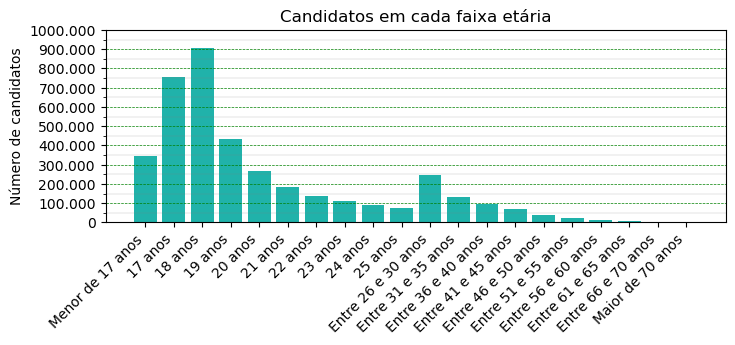

In [6]:
chaves = list(dic_idade.keys())
valores = list(dic_idade.values())

plt.figure(figsize=(8,2.5))
plt.bar(chaves, valores, color='lightseagreen')

plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 1000001, 100000),
           labels=['0'] + [f"{i}.000" for i in range(100, 1001, 100)]
          )
plt.yticks(np.arange(0, 1000001, 50000), minor=True)

plt.grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='green')
plt.grid(which='minor', axis='y', linestyle='-', linewidth='0.15', color='grey')

plt.title('Candidatos em cada faixa etária')
plt.ylabel('Número de candidatos')

plt.show()

Alguns anos após o ensino médio, há um constante declínio no número de candidatos até que, aos 30 anos de idade, temos um novo pico de candidatos nessa faixa etária

### Neste dataset, não é mostrado o lugar em que a pessoa mora, mas sim onde fica sua escola. Logo, todos os participantes que não estão na escola não apresentam informação sobre sua localização

In [7]:
estados_siglas = dados_da_escola['SG_UF_ESC']

In [8]:
estados_siglas_cont = estados_siglas.isnull().value_counts()

In [9]:
porc = [100*x/estados_siglas_cont.sum() for x in estados_siglas_cont]
porc

[75.6350542901482, 24.364945709851792]

Aproxidamente 24% dos candidatos não estão na escola

In [10]:
alunos_por_estado = dict(zip(estados_siglas.value_counts().index.tolist(),
                             estados_siglas.value_counts().values.tolist()
                            )
                        )

In [11]:
brasil = gpd.read_file('brazil_geo.json')
brasil['dados'] = brasil['id'].map(alunos_por_estado)

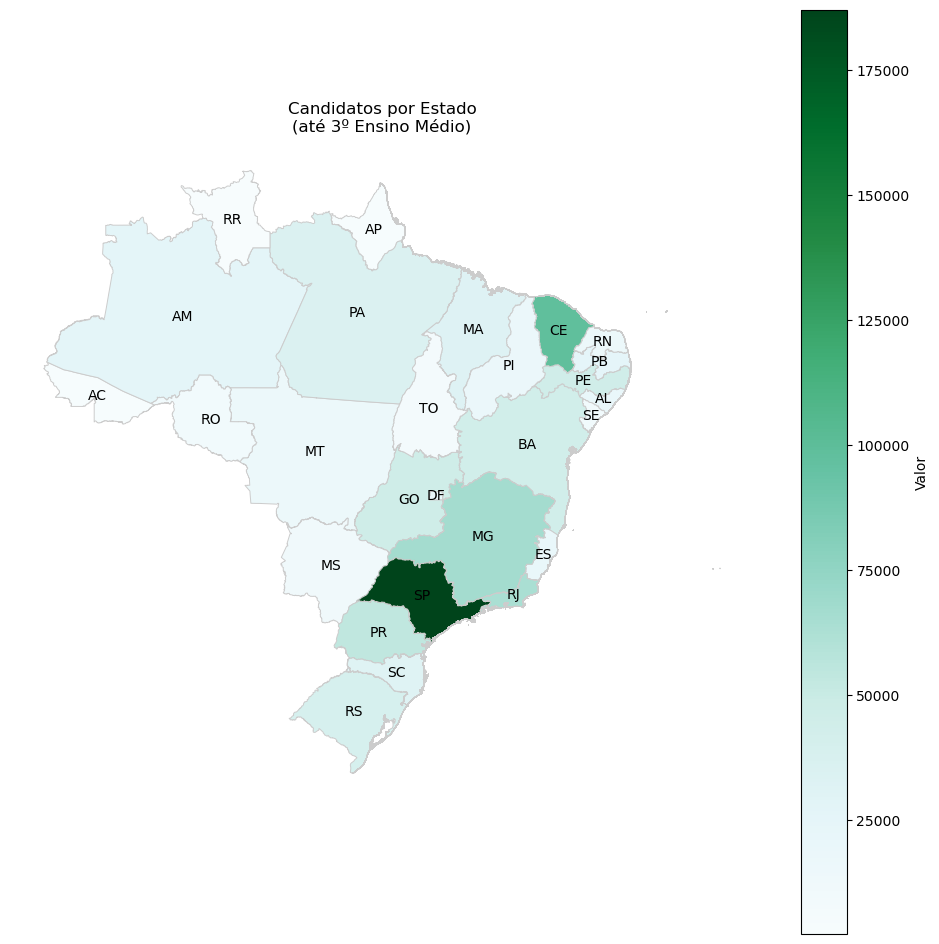

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 12))
brasil.plot(column='dados', cmap='BuGn', linewidth=0.7, ax=ax, edgecolor='0.8')


for index, row in brasil.iterrows():
    plt.annotate(
        text = row['id'],
        xy = row['geometry'].centroid.coords[0], 
        ha = 'center', 
        va = 'center')


sm = matplotlib.cm.ScalarMappable(
    cmap='BuGn', 
    norm=matplotlib.colors.Normalize(
        vmin=brasil['dados'].min(), 
        vmax=brasil['dados'].max()
    )
)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='Valor') 

ax.set_title('Candidatos por Estado\n(até 3º Ensino Médio)')
ax.set_axis_off()
plt.show()

### Porcentagem de homens e mulheres

In [13]:
serie_sexos = dados_do_participante['TP_SEXO'].value_counts()
serie_sexos

F    2411185
M    1522770
Name: TP_SEXO, dtype: int64

In [14]:
sex_porcentagem = [100*x/serie_sexos.sum() for x in serie_sexos]
sex_porcentagem

[61.291626365832855, 38.708373634167145]

Relação 60/40 entre mulheres e homens

### Redação dividida entre homens e mulheres

In [15]:
redacao_e_sexo = pd.concat([dados_do_participante['TP_SEXO'], dados_redacao['NU_NOTA_REDACAO']], axis=1)
redacao_e_sexo = redacao_e_sexo.dropna()

In [16]:
notas_fem = redacao_e_sexo[redacao_e_sexo['TP_SEXO'] == 'F']['NU_NOTA_REDACAO']
notas_masc = redacao_e_sexo[redacao_e_sexo['TP_SEXO'] == 'M']['NU_NOTA_REDACAO']

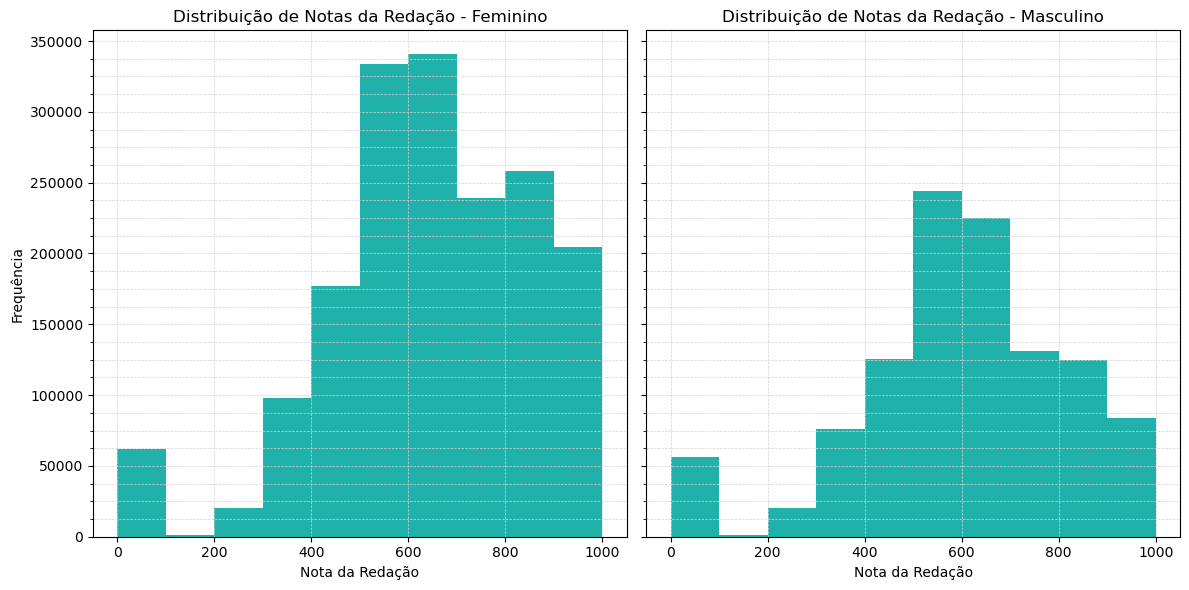

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)  # 1 linha, 2 colunas


axes[0].hist(notas_fem, bins=10, color='lightseagreen')
axes[0].set_title('Distribuição de Notas da Redação - Feminino')
axes[0].set_xlabel('Nota da Redação')
axes[0].set_ylabel('Frequência')
axes[0].grid(color='lightgrey', linestyle='--', linewidth=0.5)


axes[1].hist(notas_masc, bins=10, color='lightseagreen')
axes[1].set_title('Distribuição de Notas da Redação - Masculino')
axes[1].set_xlabel('Nota da Redação')
axes[1].grid(color='lightgrey', linestyle='--', linewidth=0.5)


from matplotlib.ticker import MultipleLocator
axes[1].yaxis.set_minor_locator(MultipleLocator(base=12500))


axes[0].grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
axes[1].grid(which='minor', color='lightgrey', linestyle='--', linewidth=0.5)

# Ajustar o layout
plt.tight_layout()
plt.show()

O sexo do candidato não traz informações significativas do desempenho do aluno

## Questionário Socieconômico

A renda familiar do candidato até 18 anos influencia nas suas notas?

In [18]:
concat1 = dados_do_participante.filter(items=['NU_INSCRICAO', 'TP_FAIXA_ETARIA'])

concat2 = dados_da_escola['SG_UF_ESC']

concat3 = dados_quest_socioeco.filter(items=['Q006'])

concat4 = dados_prova_objetiva.filter(items=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'])

concat5 = dados_redacao.filter(items=['NU_NOTA_REDACAO'])

#Nota da prova de Ciências da Natureza
#Nota da prova de Ciências Humanas
#Nota da prova de Linguagens e Códigos
#Nota da prova de Matemática

In [19]:
notas_Q006 = pd.DataFrame()
notas_Q006 = pd.concat([notas_Q006, concat1, concat2, concat3, concat4, concat5], axis=1)
notas_Q006 = notas_Q006.loc[notas_Q006['TP_FAIXA_ETARIA'] < 4]

In [20]:
sem_na = len(notas_Q006) - len(notas_Q006.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']))
porc_anulada = 100*sem_na/len(notas_Q006)

print('Temos', len(notas_Q006), 'candidatos com até 18 anos de idade. ')
print(f'{sem_na} ({porc_anulada:.2f}%) deles não compareceram à aplicação da prova ou tiveram a mesma anulada')

Temos 2006281 candidatos com até 18 anos de idade. 
414141 (20.64%) deles não compareceram à aplicação da prova ou tiveram a mesma anulada


In [21]:
notas_Q006 = notas_Q006.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [22]:
legenda_Q006 = ['Nenhuma Renda',
                'Até 1.320,00',
                'De 1.320,01 até 1.980,00',
                'De 1.980,01 até 2.640,00',
                'De 2.640,01 até 3.300,00',
                'De 3.300,01 até 3.960,00',
                'De 3.960,01 até 5.280,00', 
                'De 5.280,01 até 6.600,00',
                'De 6.600,01 até 7.920,00',
                'De 7.920,01 até 9.240,00',
                'De 9.240,01 até 10.560,00',
                'De 10.560,01 até 11.880,00',
                'De 11.880,01 até 13.200,00',
                'De 13.200,01 até 15.840,00',
                'De 15.840,01 até 19.800,00',
                'De 19.800,01 até 26.400,00',
                'Acima de 26.400,00']

lista = []

for letra in range(ord('A'), ord('Q') + 1):
  letra_char = chr(letra)
  lista.append(letra_char)
    
dict_Q006 = dict(zip(lista, legenda_Q006))

In [23]:
respostas_Q006 = notas_Q006.filter(['NU_INSCRICAO','Q006'])
respostas_Q006 = respostas_Q006.groupby('Q006').count()
respostas_Q006['texto'] = [dict_Q006[x] for x in respostas_Q006.index]
respostas_Q006 = respostas_Q006.rename(columns={'NU_INSCRICAO': 'respostas'})

In [24]:
respostas = list(respostas_Q006['respostas'])
texto = list(respostas_Q006['texto'])

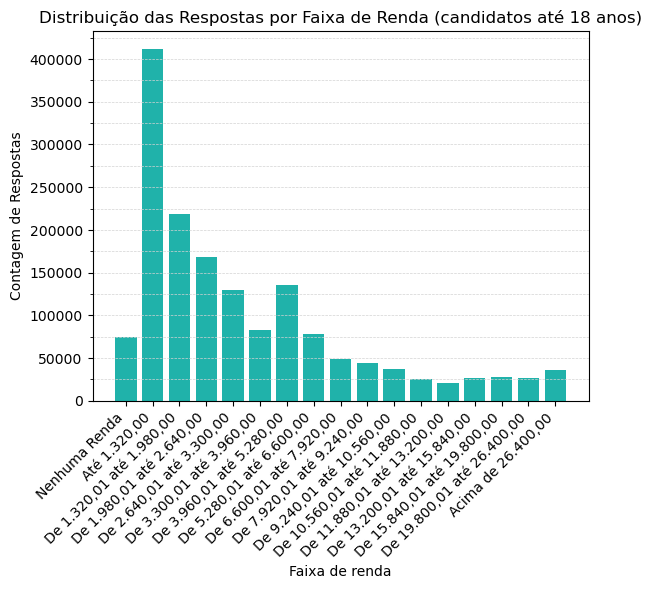

In [25]:
plt.bar(texto, respostas, color='lightseagreen')
plt.xlabel('Faixa de renda')
plt.ylabel('Contagem de Respostas')
plt.title('Distribuição das Respostas por Faixa de Renda (candidatos até 18 anos)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(0,450000,25000), minor=True)
plt.grid(which='minor' ,axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.show()

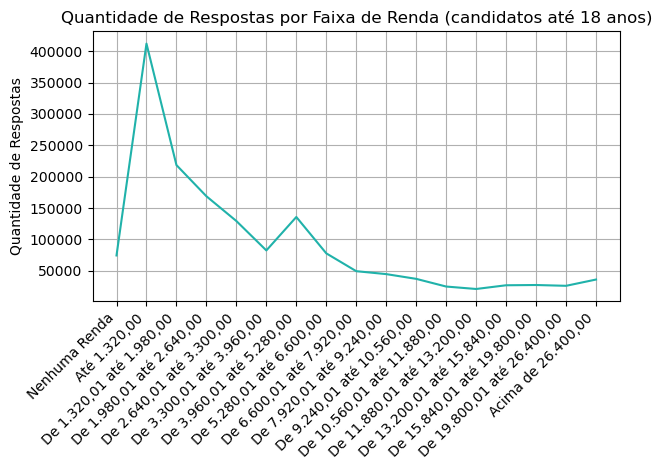

In [26]:
plt.plot(respostas, color='lightseagreen')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Quantidade de Respostas')
plt.title('Quantidade de Respostas por Faixa de Renda (candidatos até 18 anos)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Média das notas por renda

In [27]:
respostas_Q006['media_ciencias_naturais'] = round(notas_Q006.groupby('Q006')['NU_NOTA_CN'].mean(), 2)
respostas_Q006['media_ciencias_humanas'] = round(notas_Q006.groupby('Q006')['NU_NOTA_CH'].mean(), 2)
respostas_Q006['media_linguagens_codigos'] = round(notas_Q006.groupby('Q006')['NU_NOTA_LC'].mean(), 2)
respostas_Q006['media_matematica'] = round(notas_Q006.groupby('Q006')['NU_NOTA_MT'].mean(), 2)
respostas_Q006['media_redacao'] = round(notas_Q006.groupby('Q006')['NU_NOTA_REDACAO'].mean(), 2)
respostas_Q006.head()

,respostas,texto,media_ciencias_naturais,media_ciencias_humanas,media_linguagens_codigos,media_matematica,media_redacao
Q006,,,,,,,
A,74399,Nenhuma Renda,448.34,473.63,473.82,458.94,546.74
B,412074,"Até 1.320,00",460.56,490.11,490.28,480.97,581.87
C,218469,"De 1.320,01 até 1.980,00",477.98,511.02,509.85,512.96,615.77
D,168774,"De 1.980,01 até 2.640,00",488.26,522.01,519.50,530.79,634.60
E,129265,"De 2.640,01 até 3.300,00",496.79,530.30,526.78,546.58,651.09


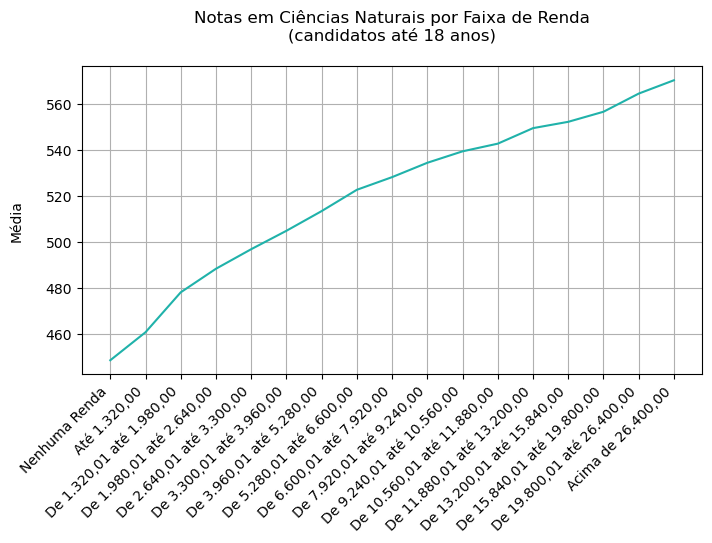

In [28]:
plt.figure(figsize=(8,4))
plt.plot(respostas_Q006['media_ciencias_naturais'],color='lightseagreen')
plt.title('Notas em Ciências Naturais por Faixa de Renda\n(candidatos até 18 anos)\n')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Média\n')
plt.grid()
plt.show()

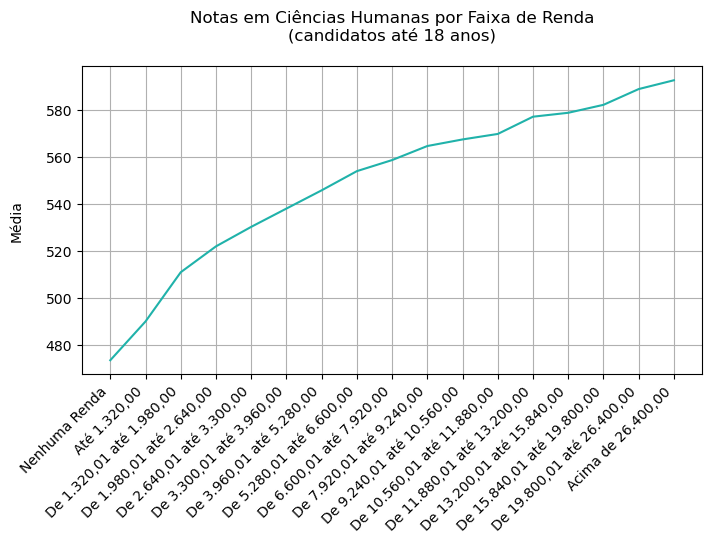

In [29]:
plt.figure(figsize=(8,4))
plt.plot(respostas_Q006['media_ciencias_humanas'], color='lightseagreen')
plt.title('Notas em Ciências Humanas por Faixa de Renda\n(candidatos até 18 anos)\n')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Média\n')
plt.grid()
plt.show()

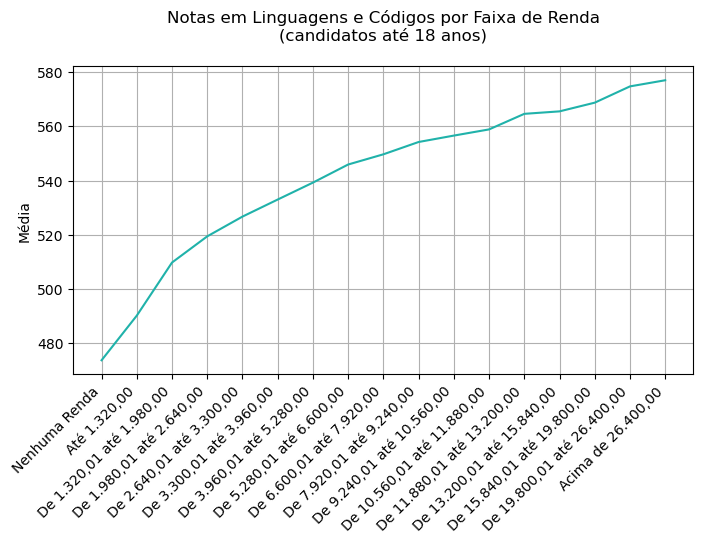

In [30]:
plt.figure(figsize=(8,4))
plt.plot(respostas_Q006['media_linguagens_codigos'], color='lightseagreen')
plt.title('Notas em Linguagens e Códigos por Faixa de Renda\n(candidatos até 18 anos)\n')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Média')
plt.grid()
plt.show()

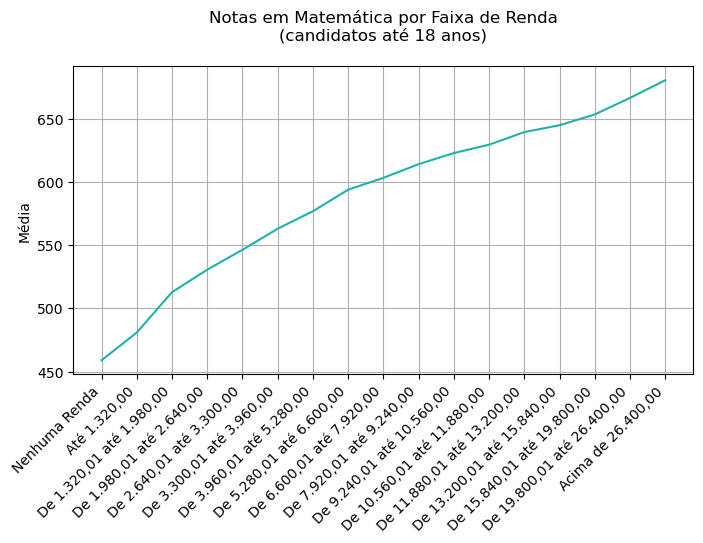

In [31]:
plt.figure(figsize=(8,4))
plt.plot(respostas_Q006['media_matematica'], color='lightseagreen')
plt.title('Notas em Matemática por Faixa de Renda\n(candidatos até 18 anos)\n')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Média')
plt.grid()
plt.show()

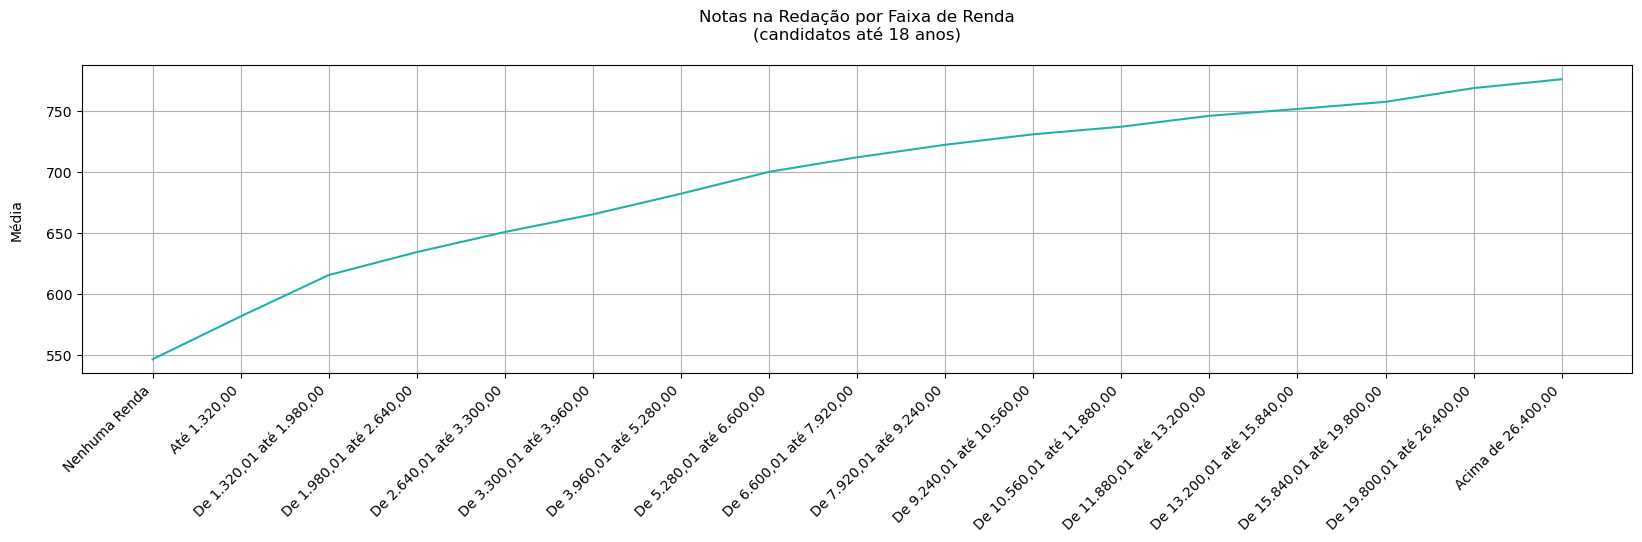

In [32]:
plt.figure(figsize=(20,4))
plt.plot(respostas_Q006['media_redacao'], color='lightseagreen')
plt.title('Notas na Redação por Faixa de Renda\n(candidatos até 18 anos)\n')
plt.xticks(range(len(texto)), texto, rotation=45, ha='right')
plt.ylabel('Média\n')
plt.grid()
plt.show()